# Import dependencies

In [2]:
import numpy as np # used for algebra operations
import pandas as pd # Data procesing
import seaborn as sns # statistical data visualization
from matplotlib import pyplot as plt
%matplotlib inline

# Import dataset

In [3]:
df = pd.read_csv('./data/data_2015.csv')
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARÍN,MIGUEL CLARO,POCURO,RICARDO LYON
0,29/03/2015 00:00,8,20.0,38.0,17,NaN,31,18
1,29/03/2015 01:00,6,21.0,14.0,14,NaN,20,13
2,29/03/2015 02:00,1,13.0,6.0,11,NaN,24,10
3,29/03/2015 03:00,3,10.0,6.0,11,NaN,10,9
4,29/03/2015 04:00,1,6.0,4.0,4,NaN,11,3


In [4]:
# Describe our dataset
df.describe()

/home/jotase/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARÍN,MIGUEL CLARO,POCURO,RICARDO LYON
count,6672.000000,6654.000000,6643.000000,6672.000000,3750.000000,6672.000000,6672.000000
mean,127.395084,70.734896,73.154900,69.884442,51.014400,126.440947,105.830036
std,162.141802,73.060974,75.088782,87.033774,52.454487,137.420884,108.762720
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,NaN,NaN,9.000000,NaN,18.000000,11.000000
50%,84.000000,NaN,NaN,47.000000,NaN,100.000000,89.000000
75%,169.000000,NaN,NaN,85.000000,NaN,170.000000,153.000000
max,948.000000,381.000000,538.000000,506.000000,290.000000,754.000000,556.000000


In [19]:
# normalize columns
df = df.rename(index=str, columns={"MARÍN": "MARIN"})
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON,DayOfWeek,Hour,total,date,date_delta
0,29/03/2015 00:00,8,38.0,38.0,17,38.0,31,18,Sunday,0,188.0,2015-03-29 00:00:00,84.000000
1,29/03/2015 01:00,6,14.0,14.0,14,14.0,20,13,Sunday,1,95.0,2015-03-29 01:00:00,84.041667
2,29/03/2015 02:00,1,6.0,6.0,11,6.0,24,10,Sunday,2,64.0,2015-03-29 02:00:00,84.083333
3,29/03/2015 03:00,3,6.0,6.0,11,6.0,10,9,Sunday,3,51.0,2015-03-29 03:00:00,84.125000
4,29/03/2015 04:00,1,4.0,4.0,4,4.0,11,3,Sunday,4,31.0,2015-03-29 04:00:00,84.166667


In [5]:
# MIGUEL CLARO, ANTONIO VARAS and BUSTAMANTE have missing values, 
# if you see the max count it's 6672, and those have less than that
# so we should fill these missing values

# let's fill with average values from their respective column


# Fill missing data
df['BUSTAMANTE'] = df['BUSTAMANTE'].fillna(0);
df['MIGUEL CLARO'] = df['BUSTAMANTE'].fillna(0);
df['ANTONIO VARAS'] = df['BUSTAMANTE'].fillna(0);
df.describe()

,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARÍN,MIGUEL CLARO,POCURO,RICARDO LYON
count,6672.000000,6672.000000,6672.000000,6672.000000,6672.000000,6672.000000,6672.000000
mean,127.395084,72.836930,72.836930,69.884442,72.836930,126.440947,105.830036
std,162.141802,75.079809,75.079809,87.033774,75.079809,137.420884,108.762720
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,11.000000,11.000000,9.000000,11.000000,18.000000,11.000000
50%,84.000000,62.000000,62.000000,47.000000,62.000000,100.000000,89.000000
75%,169.000000,99.250000,99.250000,85.000000,99.250000,170.000000,153.000000
max,948.000000,538.000000,538.000000,506.000000,538.000000,754.000000,556.000000


In [6]:
# let's create another column with day of week

import datetime

def convertDateToDayOfWeek(date):
    return datetime.datetime.strptime(date, '%d/%m/%Y %H:%M').strftime('%A')

df['DayOfWeek'] = df['Fecha'].map(lambda x: convertDateToDayOfWeek(x))
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARÍN,MIGUEL CLARO,POCURO,RICARDO LYON,DayOfWeek
0,29/03/2015 00:00,8,38.0,38.0,17,38.0,31,18,Sunday
1,29/03/2015 01:00,6,14.0,14.0,14,14.0,20,13,Sunday
2,29/03/2015 02:00,1,6.0,6.0,11,6.0,24,10,Sunday
3,29/03/2015 03:00,3,6.0,6.0,11,6.0,10,9,Sunday
4,29/03/2015 04:00,1,4.0,4.0,4,4.0,11,3,Sunday


In [7]:
# Let's create a new column "hour" 

df['Hour'] = df['Fecha'].map(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H:%M').hour)
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARÍN,MIGUEL CLARO,POCURO,RICARDO LYON,DayOfWeek,Hour
0,29/03/2015 00:00,8,38.0,38.0,17,38.0,31,18,Sunday,0
1,29/03/2015 01:00,6,14.0,14.0,14,14.0,20,13,Sunday,1
2,29/03/2015 02:00,1,6.0,6.0,11,6.0,24,10,Sunday,2
3,29/03/2015 03:00,3,6.0,6.0,11,6.0,10,9,Sunday,3
4,29/03/2015 04:00,1,4.0,4.0,4,4.0,11,3,Sunday,4


In [23]:
# Create a total column
bike_ways = ['ANDRES BELLO', 'ANTONIO VARAS', 'BUSTAMANTE', 'MARIN', 'MIGUEL CLARO', 'POCURO', 'RICARDO LYON']
df['total'] = df[bike_ways].sum(axis=1)
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON,DayOfWeek,Hour,total,date,date_delta
0,29/03/2015 00:00,8,38.0,38.0,17,38.0,31,18,Sunday,0,188.0,2015-03-29 00:00:00,84.000000
1,29/03/2015 01:00,6,14.0,14.0,14,14.0,20,13,Sunday,1,95.0,2015-03-29 01:00:00,84.041667
2,29/03/2015 02:00,1,6.0,6.0,11,6.0,24,10,Sunday,2,64.0,2015-03-29 02:00:00,84.083333
3,29/03/2015 03:00,3,6.0,6.0,11,6.0,10,9,Sunday,3,51.0,2015-03-29 03:00:00,84.125000
4,29/03/2015 04:00,1,4.0,4.0,4,4.0,11,3,Sunday,4,31.0,2015-03-29 04:00:00,84.166667


In [24]:
# create a timestamp column
df['date'] = pd.to_datetime(df['Fecha'])    
df['date_delta'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D')
df.head()


,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON,DayOfWeek,Hour,total,date,date_delta
0,29/03/2015 00:00,8,38.0,38.0,17,38.0,31,18,Sunday,0,188.0,2015-03-29 00:00:00,84.000000
1,29/03/2015 01:00,6,14.0,14.0,14,14.0,20,13,Sunday,1,95.0,2015-03-29 01:00:00,84.041667
2,29/03/2015 02:00,1,6.0,6.0,11,6.0,24,10,Sunday,2,64.0,2015-03-29 02:00:00,84.083333
3,29/03/2015 03:00,3,6.0,6.0,11,6.0,10,9,Sunday,3,51.0,2015-03-29 03:00:00,84.125000
4,29/03/2015 04:00,1,4.0,4.0,4,4.0,11,3,Sunday,4,31.0,2015-03-29 04:00:00,84.166667


In [25]:
def factorPlot(x, y, x_name, y_name):
    DOW = pd.DataFrame(list(zip(x,y)), columns=[x_name,y_name], index=None)
    return sns.factorplot(x=x_name, y=y_name, data = DOW, kind="bar", size=8, aspect=1.9)

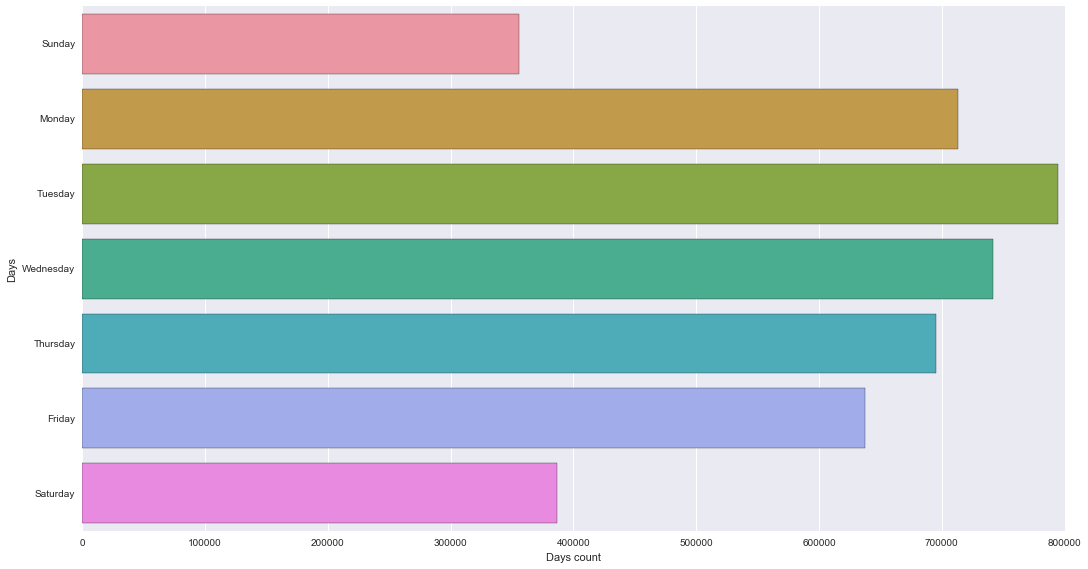

In [ ]:
days = df['DayOfWeek'].unique()
total_count_by_day = []
for day in days :
    total_count_by_day.append(df.loc[df['DayOfWeek'] == day, 'total'].sum())
factorPlot(total_count_by_day, days, 'Days count','Days')

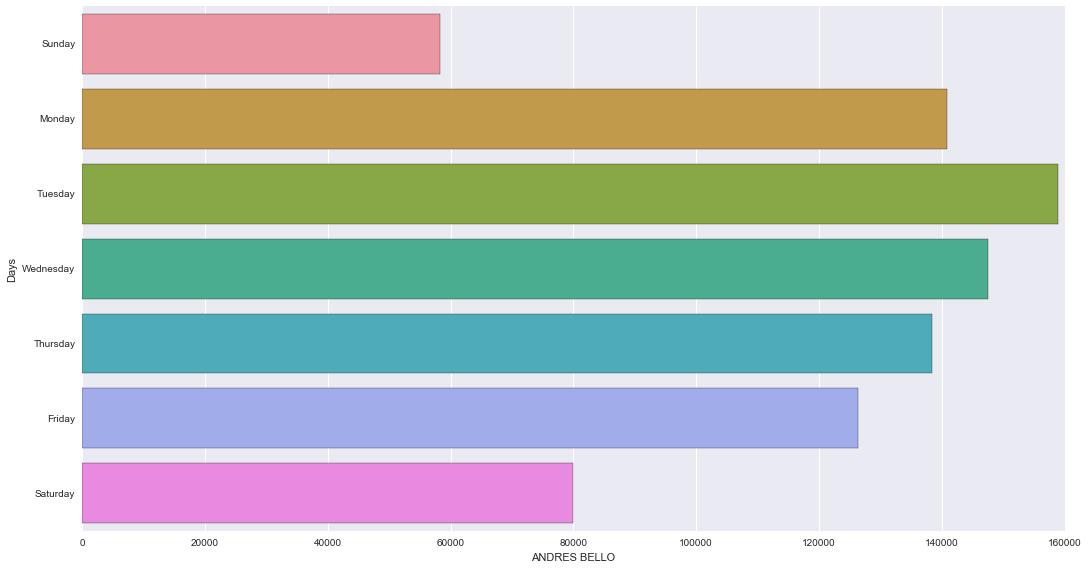

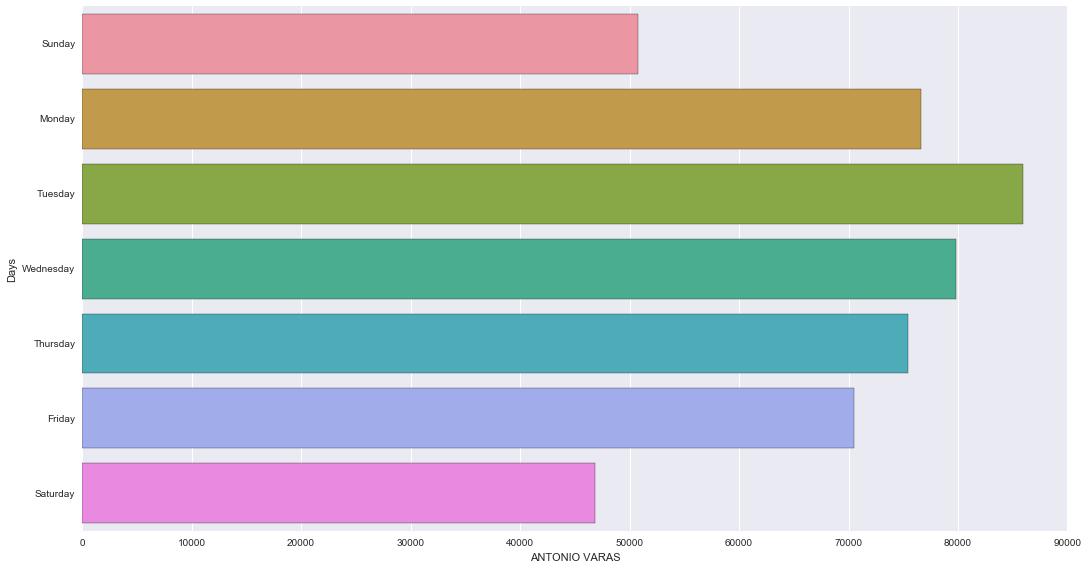

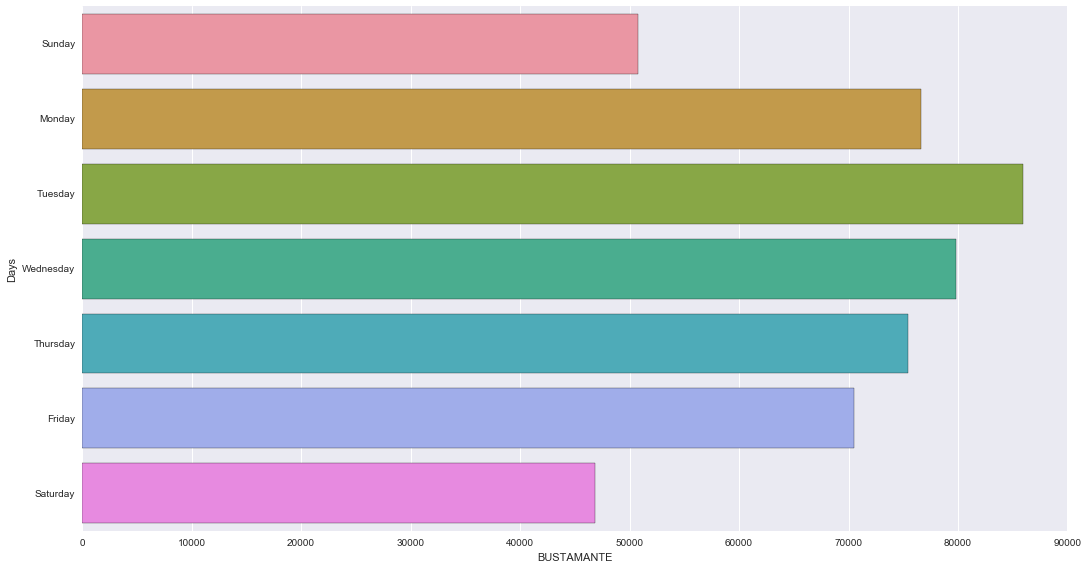

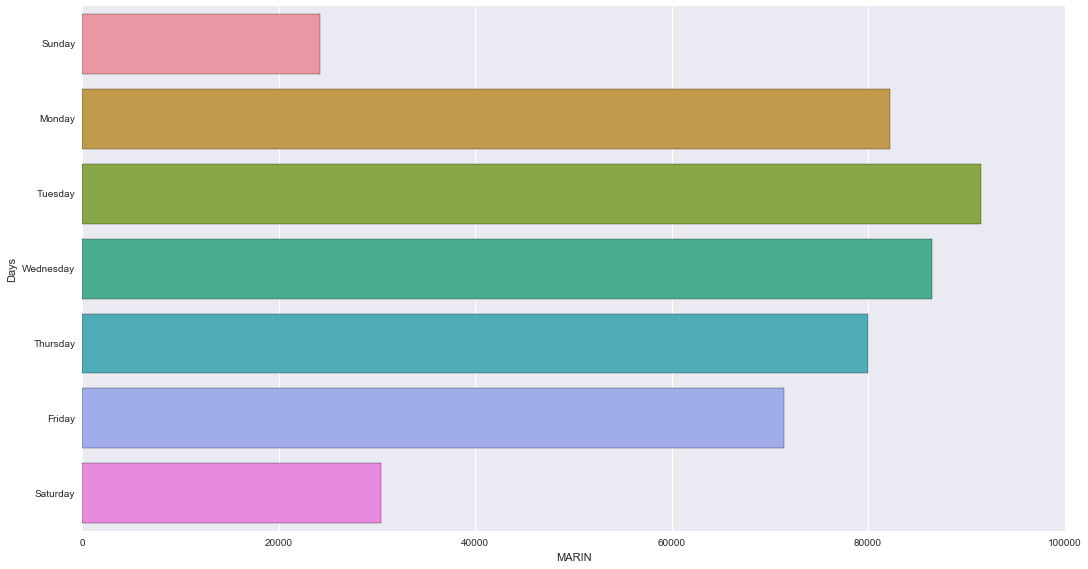

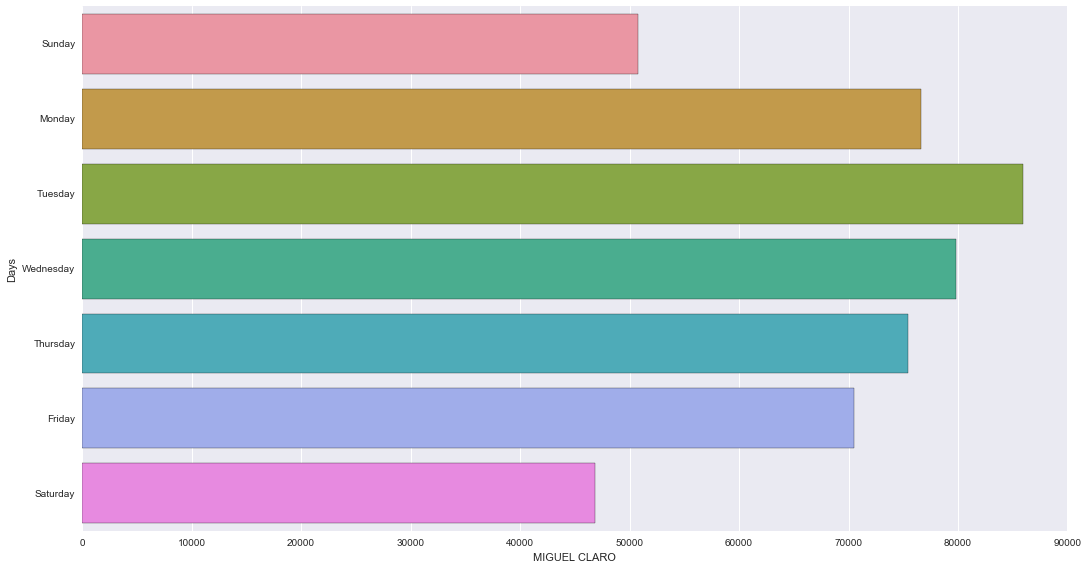

In [ ]:
total_count_by_bike_ways = []
for bike_way in bike_ways:
    total_count_by_day = []
    for day in days:
        total_count_by_day.append(df.loc[df['DayOfWeek'] == day, bike_way].sum())
        
    factorPlot(total_count_by_day, days, bike_way, 'Days')
